# The social aspect of  cryptocurrencies
This will analyze different cryptocurrencies in order to get insight into ROI, country of origin, and number of exchanges listed


### How does exchange listing affect the price of a coin?
#### Will coins listed in more exchanges have a higher appreciation in price?


### From the top 100 coins, how many coins have appreciated double digits? triple? quadruple?

### Does country of origin affect price of coin?


### What is the relationship between market cap and percentage gains in the last 3 years?

### How has internet interactions changed over the last 3 years for cryptocurrencies?

#### Look at twitter followers for accounts, re

In [1]:
%matplotlib notebook

In [2]:
#import dependencies
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from matplotlib import pyplot as plt
import os
import seaborn as sns

In [3]:
# Import csv files and convert them to Data frames

# Set up paths
crypto_path = os.path.join("data", "cryptocurrencies_data_2021.csv")
social_2018_path = os.path.join("data", "2018_social.csv")
social_2021_path = os.path.join("data", "2021_social.csv")

# Load first csv and drop extra column "Unnamed: 0"
crypto_data_2021_df = pd.read_csv(crypto_path).drop(columns='Unnamed: 0')
crypto_data_2021_df.nunique()

id                          2250
symbol                      2182
price_04-22-21              2116
market_cap_billion(2021)    2250
market_cap_rank             2250
ath                         2003
ath_change_percentage       2245
ath_date                    1980
atl                         2151
atl_change_percentage       2247
atl_date                    2198
dtype: int64

In [4]:
# Load 2018 social_metrics csv and make it a data frame
social_2018_df = pd.read_csv(social_2018_path).drop(columns='Unnamed: 0')

In [5]:
social_2018_df.nunique()

id                               328
price 01-04-2018                 104
market_cap_2018(millions)        100
reddit_subscribers 01-04-2018     92
twitter_followers 01-04-2018     103
alexa_rank 01-04-2018            100
dtype: int64

In [6]:
# Load 2021 social metrics csv, make it a dataframe and drop unnamed column
social_2021_df = pd.read_csv(social_2021_path).drop(columns='Unnamed: 0')
social_2021_df.nunique()

id                               204
price 01-04-2021                 200
market_cap_2021(millions)        195
reddit_subscribers 01-04-2021    128
twitter_followers 01-04-2021     171
alexa_rank 01-04-2021            185
dtype: int64

In [7]:
# Clean 2018 Data frame by dropping NAN values
clean_2018_df = social_2018_df.dropna()
clean_2018_df.nunique()

id                               89
price 01-04-2018                 89
market_cap_2018(millions)        86
reddit_subscribers 01-04-2018    89
twitter_followers 01-04-2018     89
alexa_rank 01-04-2018            88
dtype: int64

In [8]:
clean_2018_df['market_cap_2018(millions)'] = clean_2018_df['market_cap_2018(millions)'] / 1000
clean_2018_df.rename(columns = {'market_cap_2018(millions)' : 'market_cap_2018(millions)'}, inplace=True)
clean_2018_df.head()

<ipython-input-8-d1a642c06d13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_2018_df['market_cap_2018(millions)'] = clean_2018_df['market_cap_2018(millions)'] / 1000
/usr/local/Cellar/jupyterlab/3.0.12/libexec/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,id,price 01-04-2018,market_cap_2018(millions),reddit_subscribers 01-04-2018,twitter_followers 01-04-2018,alexa_rank 01-04-2018
0,bitcoin,6975.275314,118.234055,785619.0,819312.0,5574.0
1,ethereum,395.796381,39.000868,348116.0,382159.0,8204.0
2,binancecoin,11.115511,1.100591,40605.0,176.0,230.0
3,ripple,0.511990,20.016004,184063.0,843082.0,5224.0
5,cardano,0.155532,4.032488,60486.0,124345.0,13650.0


In [9]:
# Clean 2021 Data frame by dropping NAN values
clean_2021_df = social_2021_df.dropna()
clean_2021_df

,id,price 01-04-2021,market_cap_2021(millions),reddit_subscribers 01-04-2021,twitter_followers 01-04-2021,alexa_rank 01-04-2021
0,bitcoin,58817.373888,1.098127e+06,2648989.0,83714.0,5018.0
1,ethereum,1915.832536,2.212107e+05,753614.0,852223.0,6152.0
3,ripple,0.573818,2.634585e+04,278986.0,1310270.0,11412.0
5,cardano,1.192192,3.826120e+04,302631.0,297688.0,8118.0
6,dogecoin,0.054382,7.014690e+03,1229059.0,686374.0,11467.0
...,...,...,...,...,...,...
195,aragon,10.851830,3.801019e+02,2912.0,81289.0,113796.0
198,metadium,0.354968,5.731558e+02,206.0,826.0,586913.0
199,bitshares,0.098297,2.686574e+02,7029.0,3523.0,111487.0
202,velas,0.161867,2.221146e+02,93.0,18798.0,168994.0


In [10]:
def bar_plot(data_frame, x_values,y_column, color='b', fig_size = [10,5]):
    # Define size of figure
    plt.figure(figsize = fig_size)
    # arrange x_axis values based in the lenght of the Data Frame
    x_axis = np.arange(len(data_frame))
    # Use a list comprehension to adjust x ticks location if needed
    tick_locations = [value for value in x_axis]
    # define y values
    y_values = data_frame[f"{y_column}"]
    # plot x and y values, 
    plt.bar(x_axis, y_values, alpha=0.5, color=f'{color}')
    # place x ticks at the locations we calculated earlier, utilize the x values as labels, rotate and resize ticks
    plt.xticks(tick_locations, data_frame[f"{x_values}"], rotation='vertical', size=9)
    # label graph
    plt.xlabel("Cryptocurrency")
    plt.ylabel(f"{y_column}")
    title = plt.title(f"{y_column} vs {x_values}")
    # annotate figures with twitter handle because thieves
    plt.annotate("@johannvillalvir", [50, 700000], color="b", size=24)
    # make the layout fit in the screen size
    plt.tight_layout()
    # show the grapgh
    plt.show()



<IPython.core.display.Javascript object>


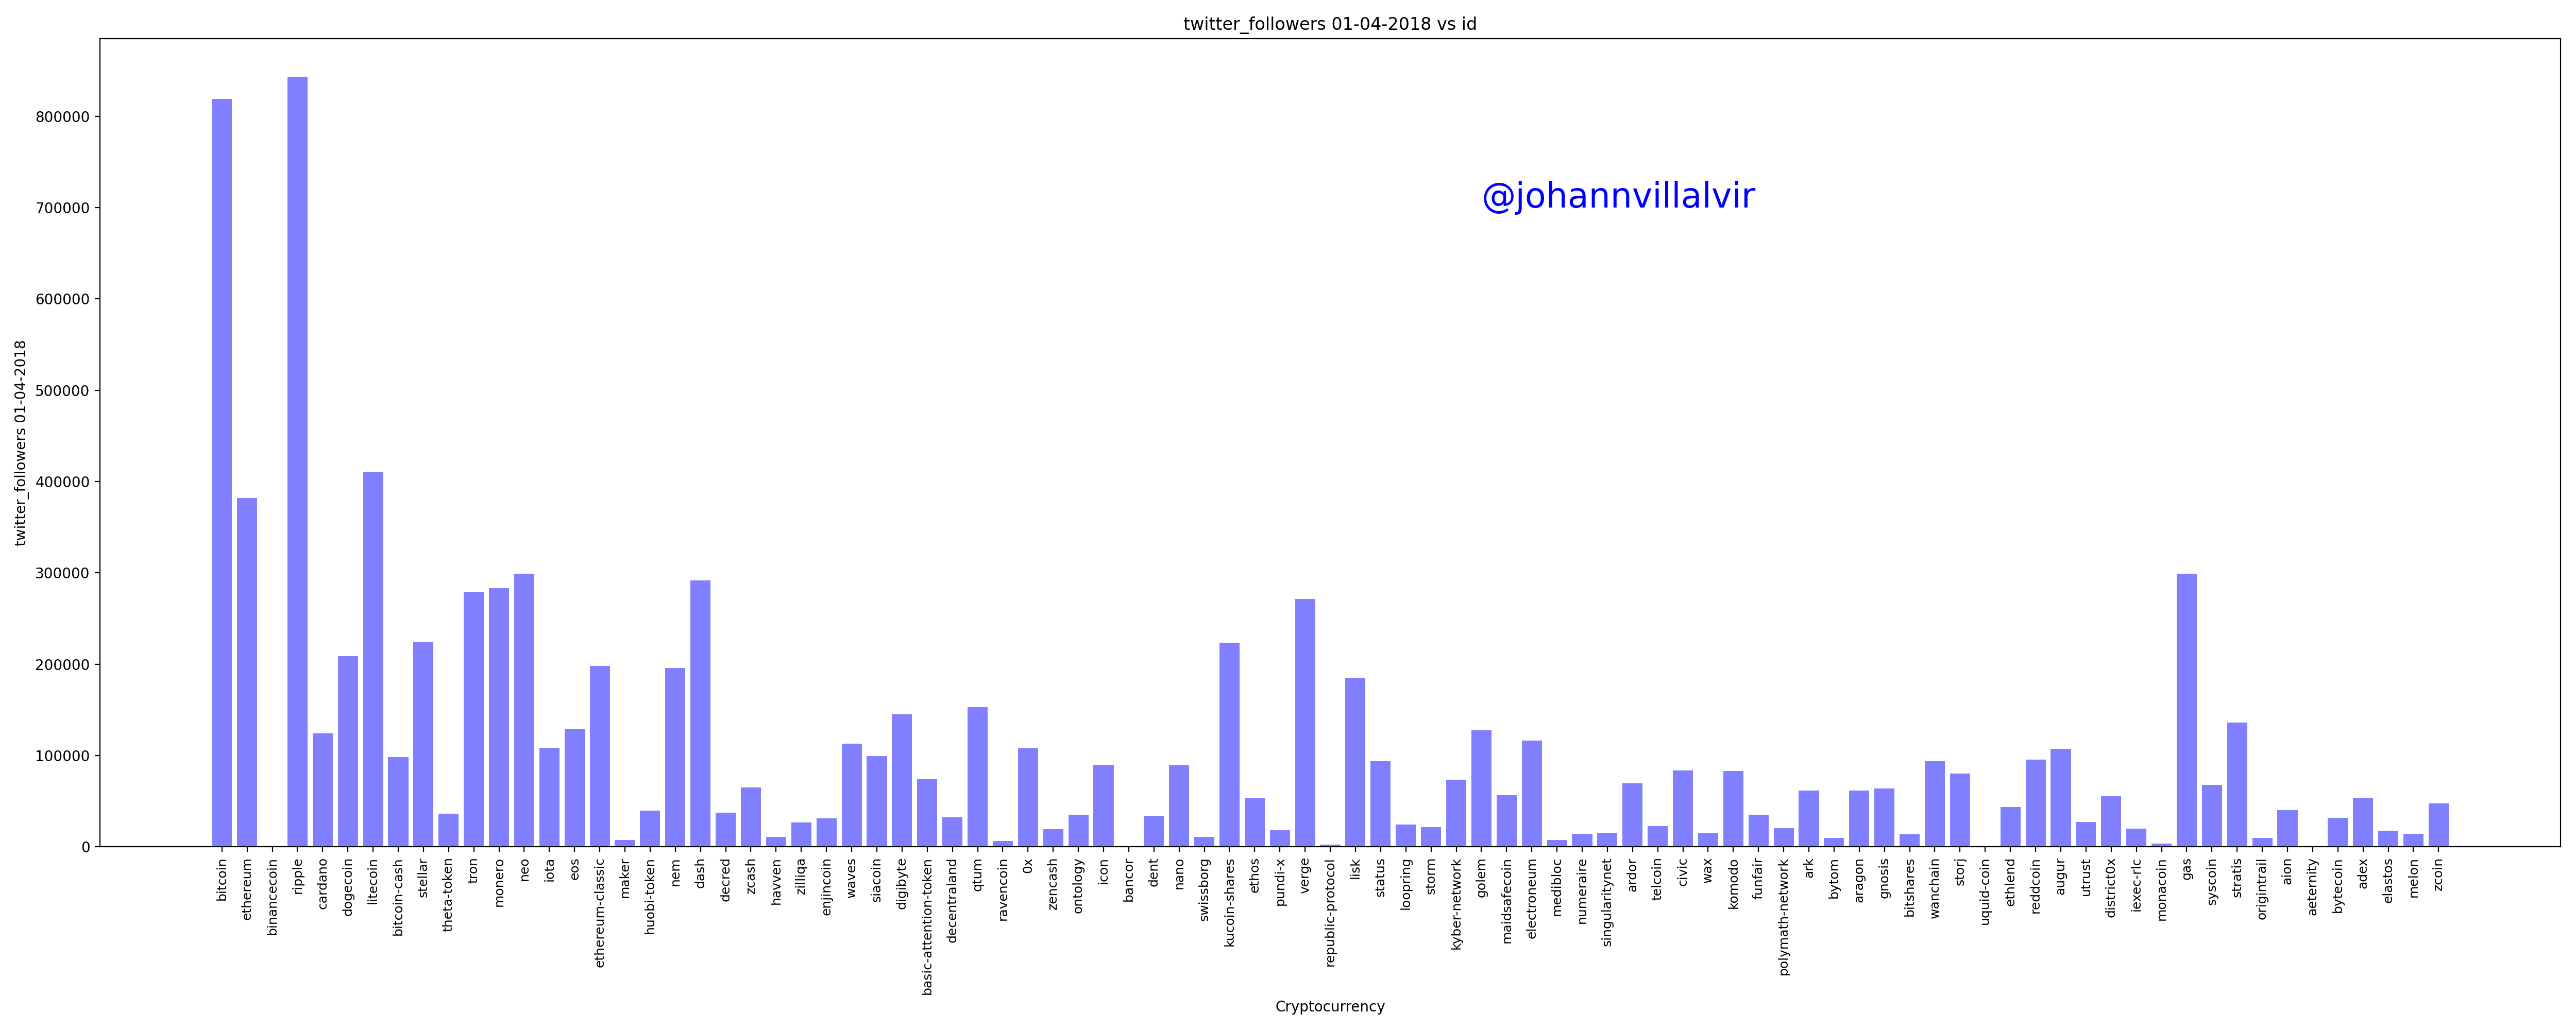

In [11]:
# What is the relationship between social media activity and market cap in the last 3 years?

# Make a graph for social metrics for 2018
# X axis is sorted by market cap in descending from left to right
twitter_metrics = bar_plot(clean_2018_df, 'id', 'twitter_followers 01-04-2018', fig_size =[25, 10])
plt.savefig("images/2018_twitter.png")


<IPython.core.display.Javascript object>


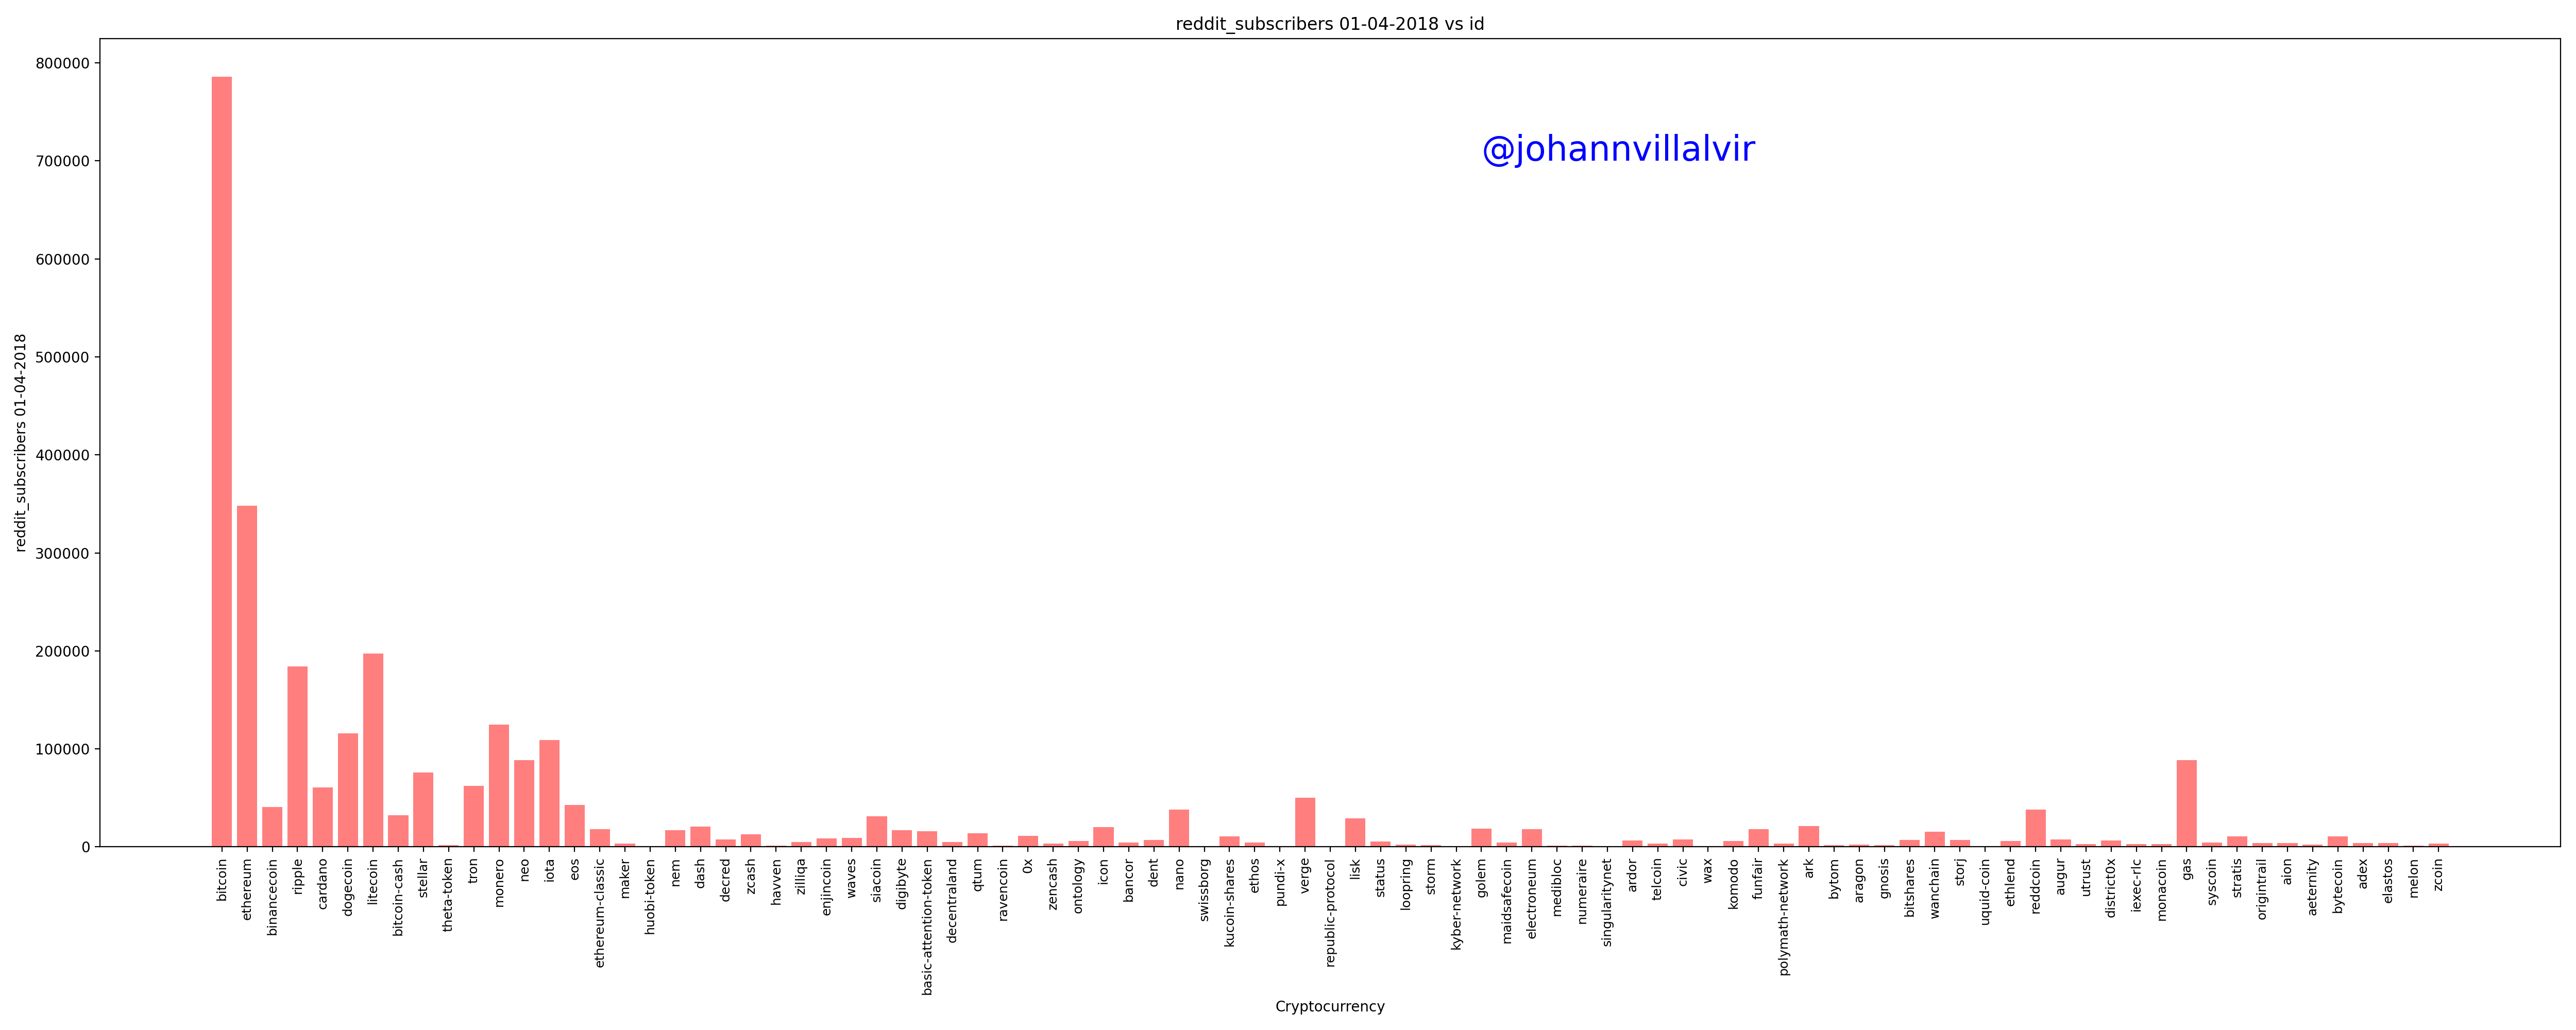

In [12]:
reddit_metrics = bar_plot(clean_2018_df,'id', 'reddit_subscribers 01-04-2018', 'red', [25, 10])
plt.savefig("images/2018_reddit.png")


<IPython.core.display.Javascript object>


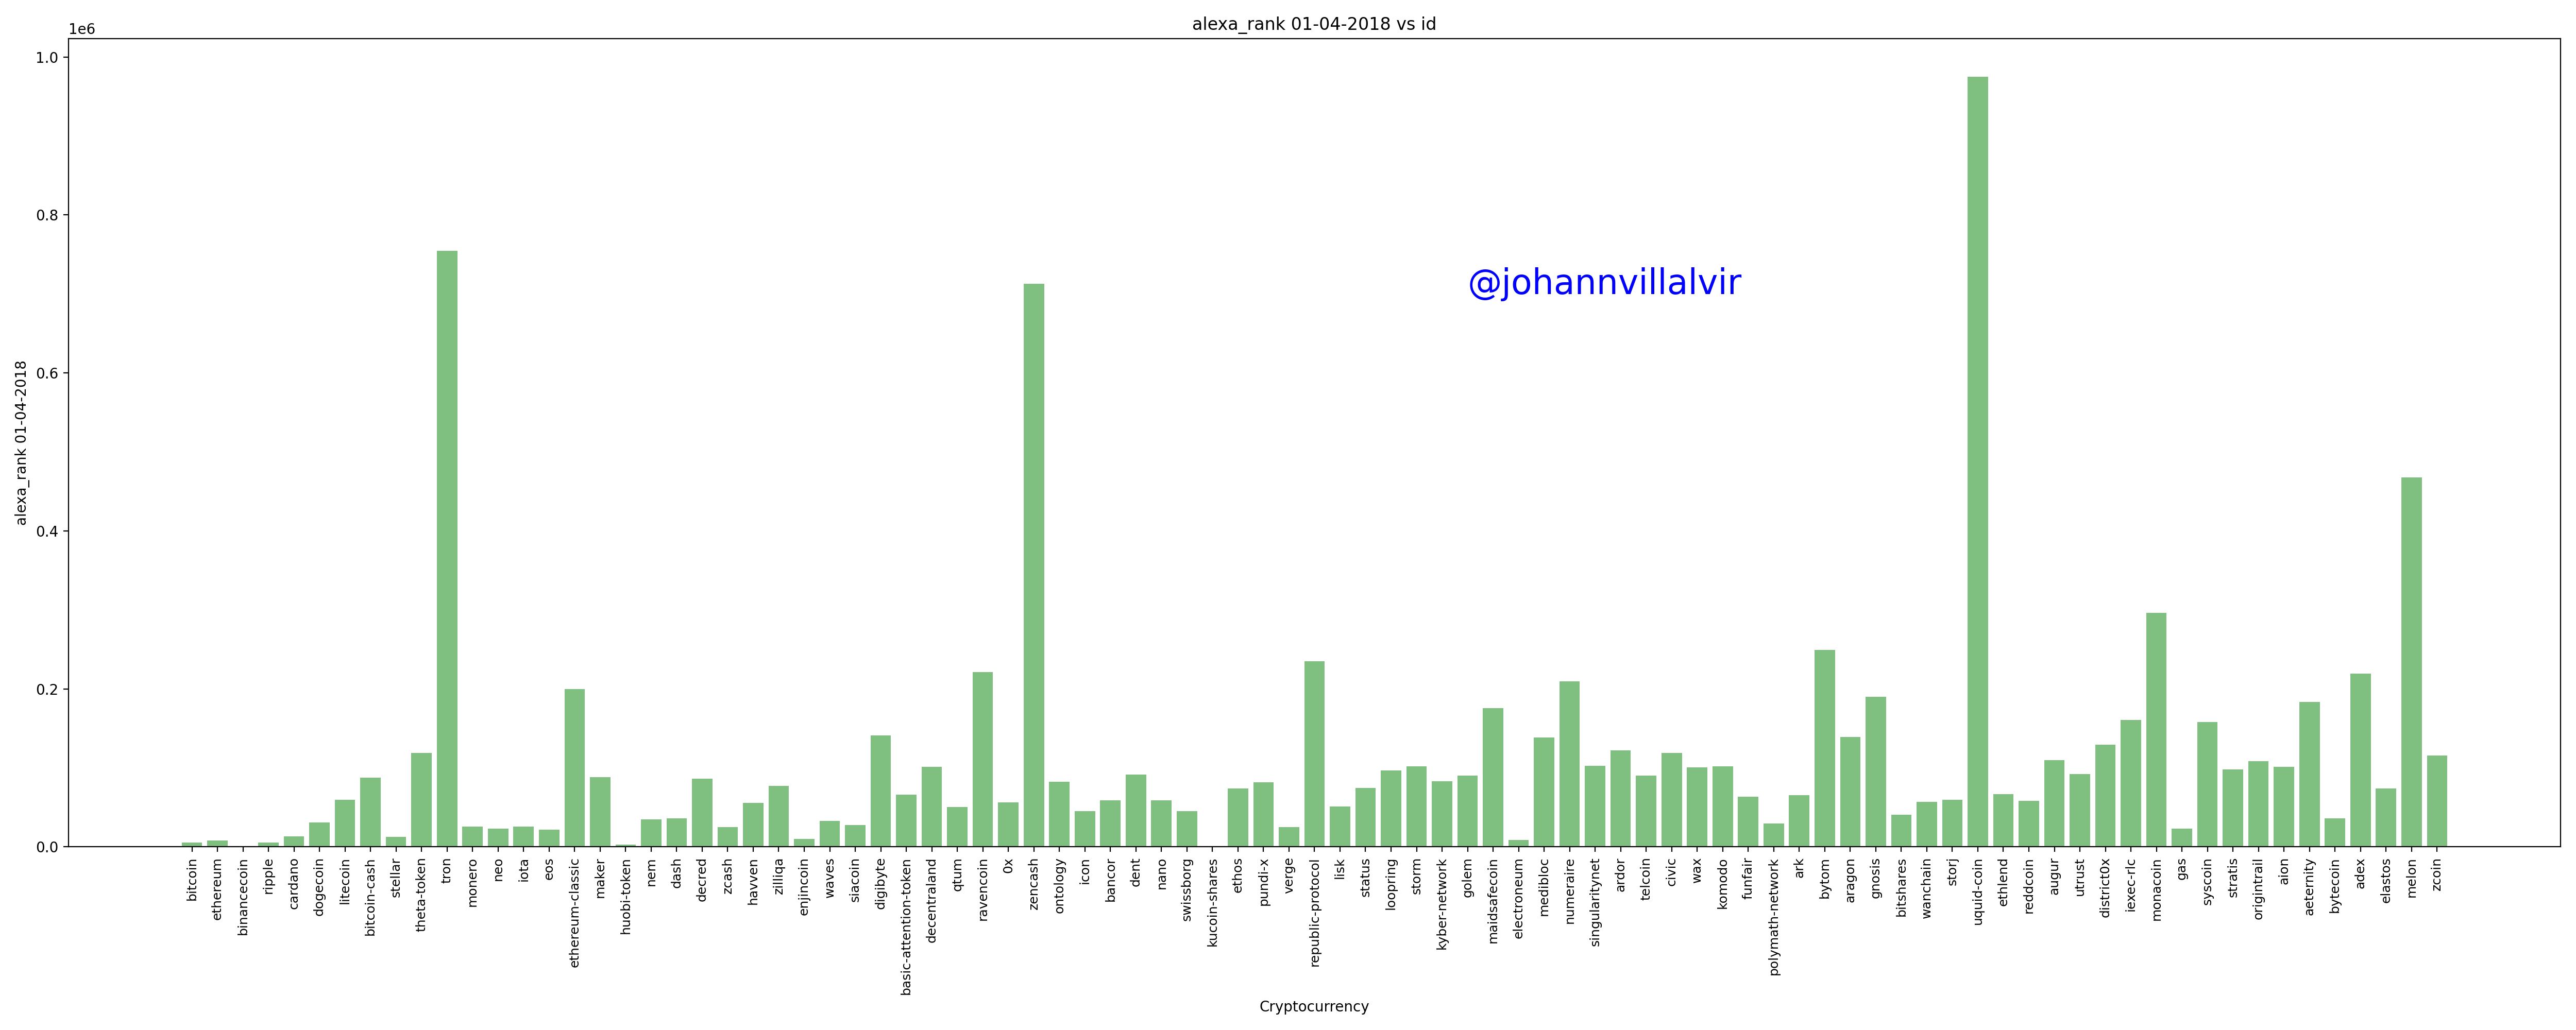

In [13]:
alexa_metrics = bar_plot(clean_2018_df, 'id', 'alexa_rank 01-04-2018', 'green', [25, 10])
plt.savefig("images/2018_alexa_rank.png")

In [14]:
len(clean_2021_df)

112

<IPython.core.display.Javascript object>


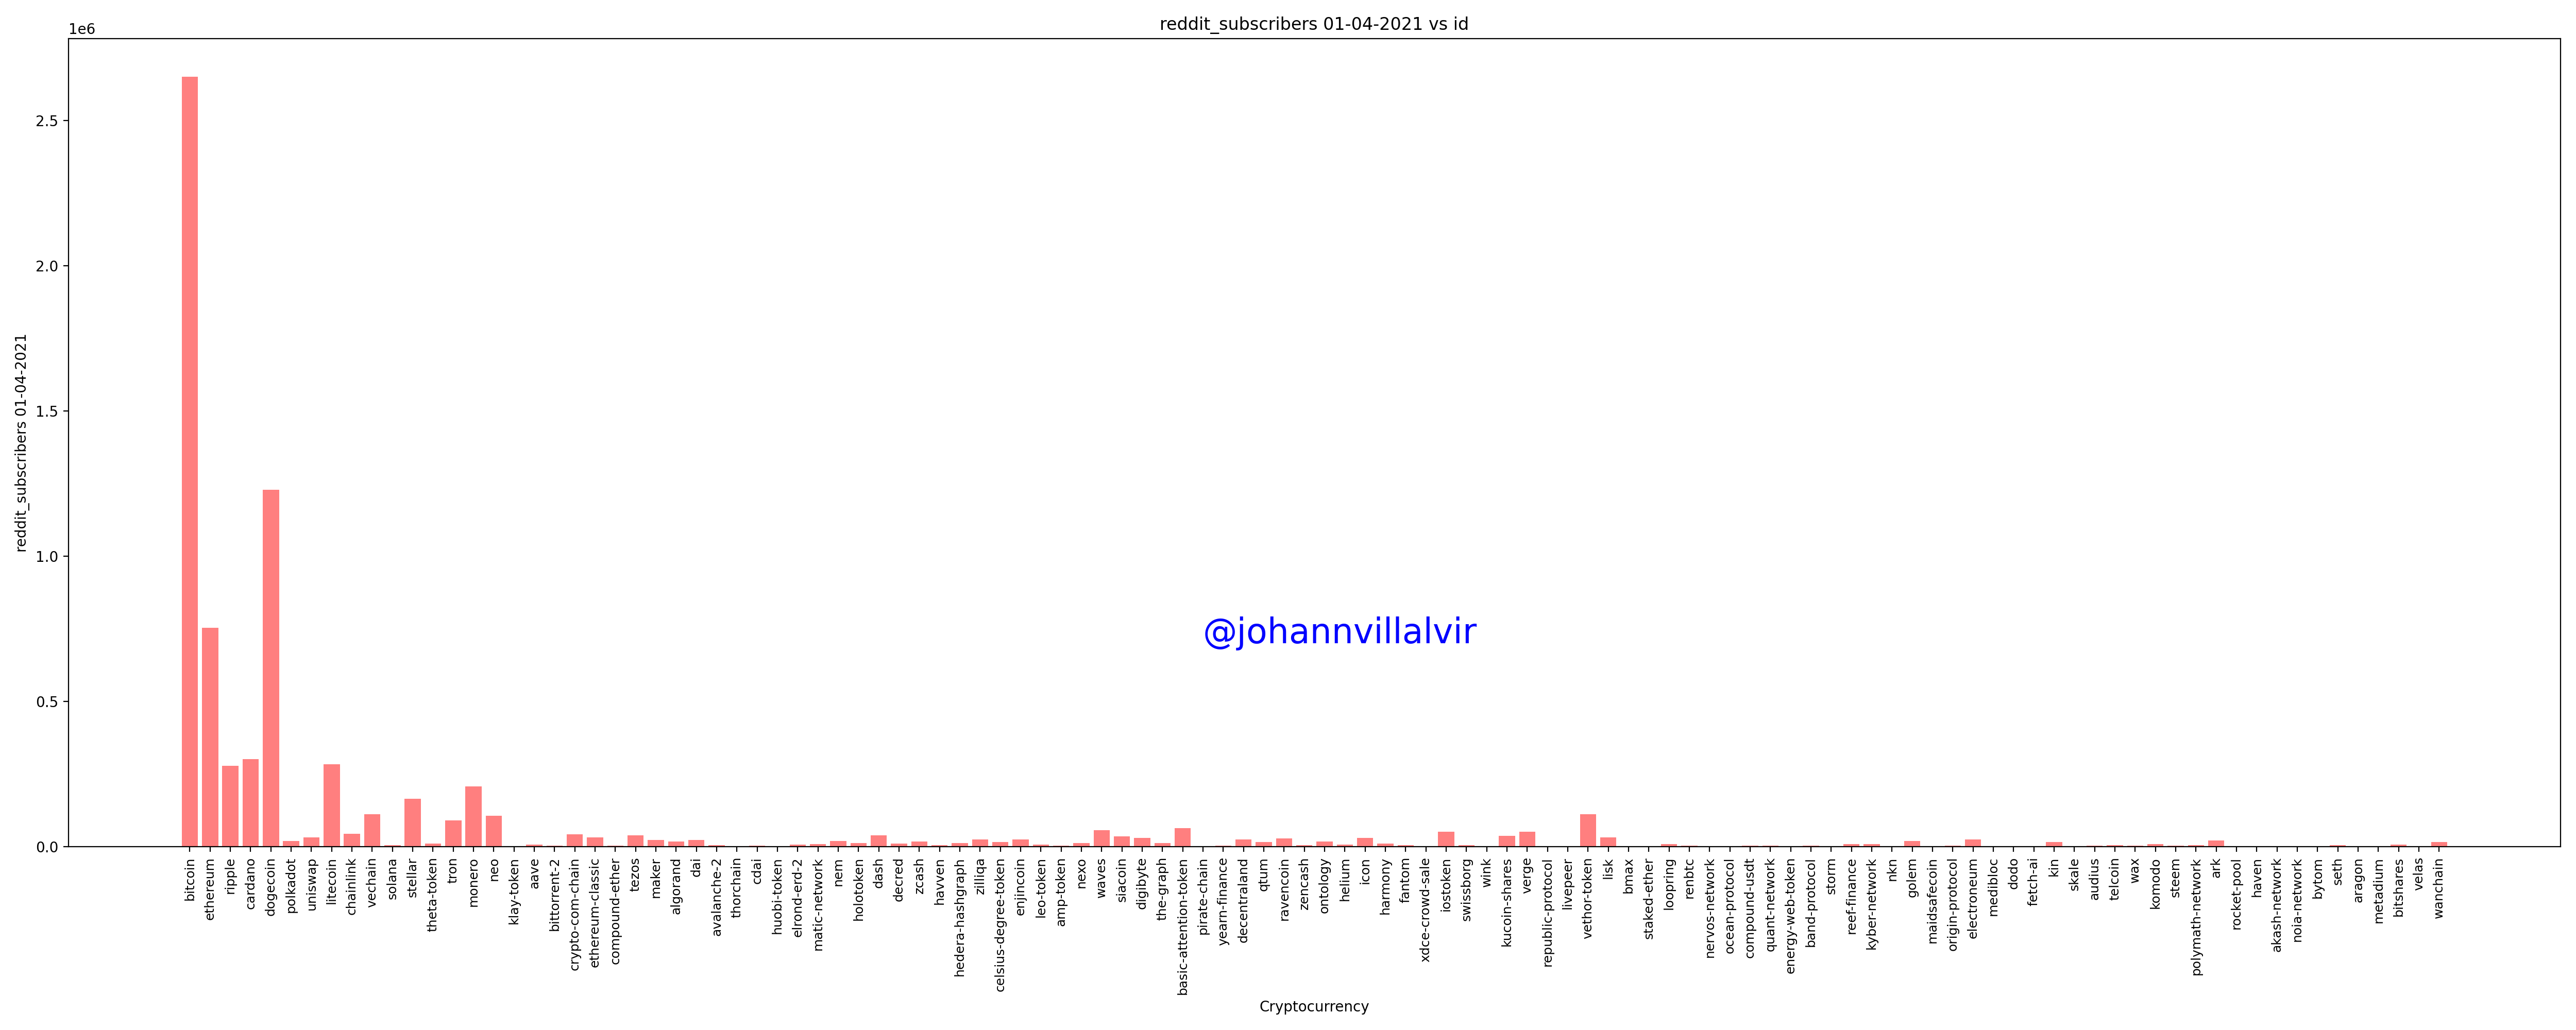

In [15]:
bar_plot(clean_2021_df, 'id', 'reddit_subscribers 01-04-2021', 'r', [25, 10])
plt.savefig("images/2021_reddit.png")

<IPython.core.display.Javascript object>


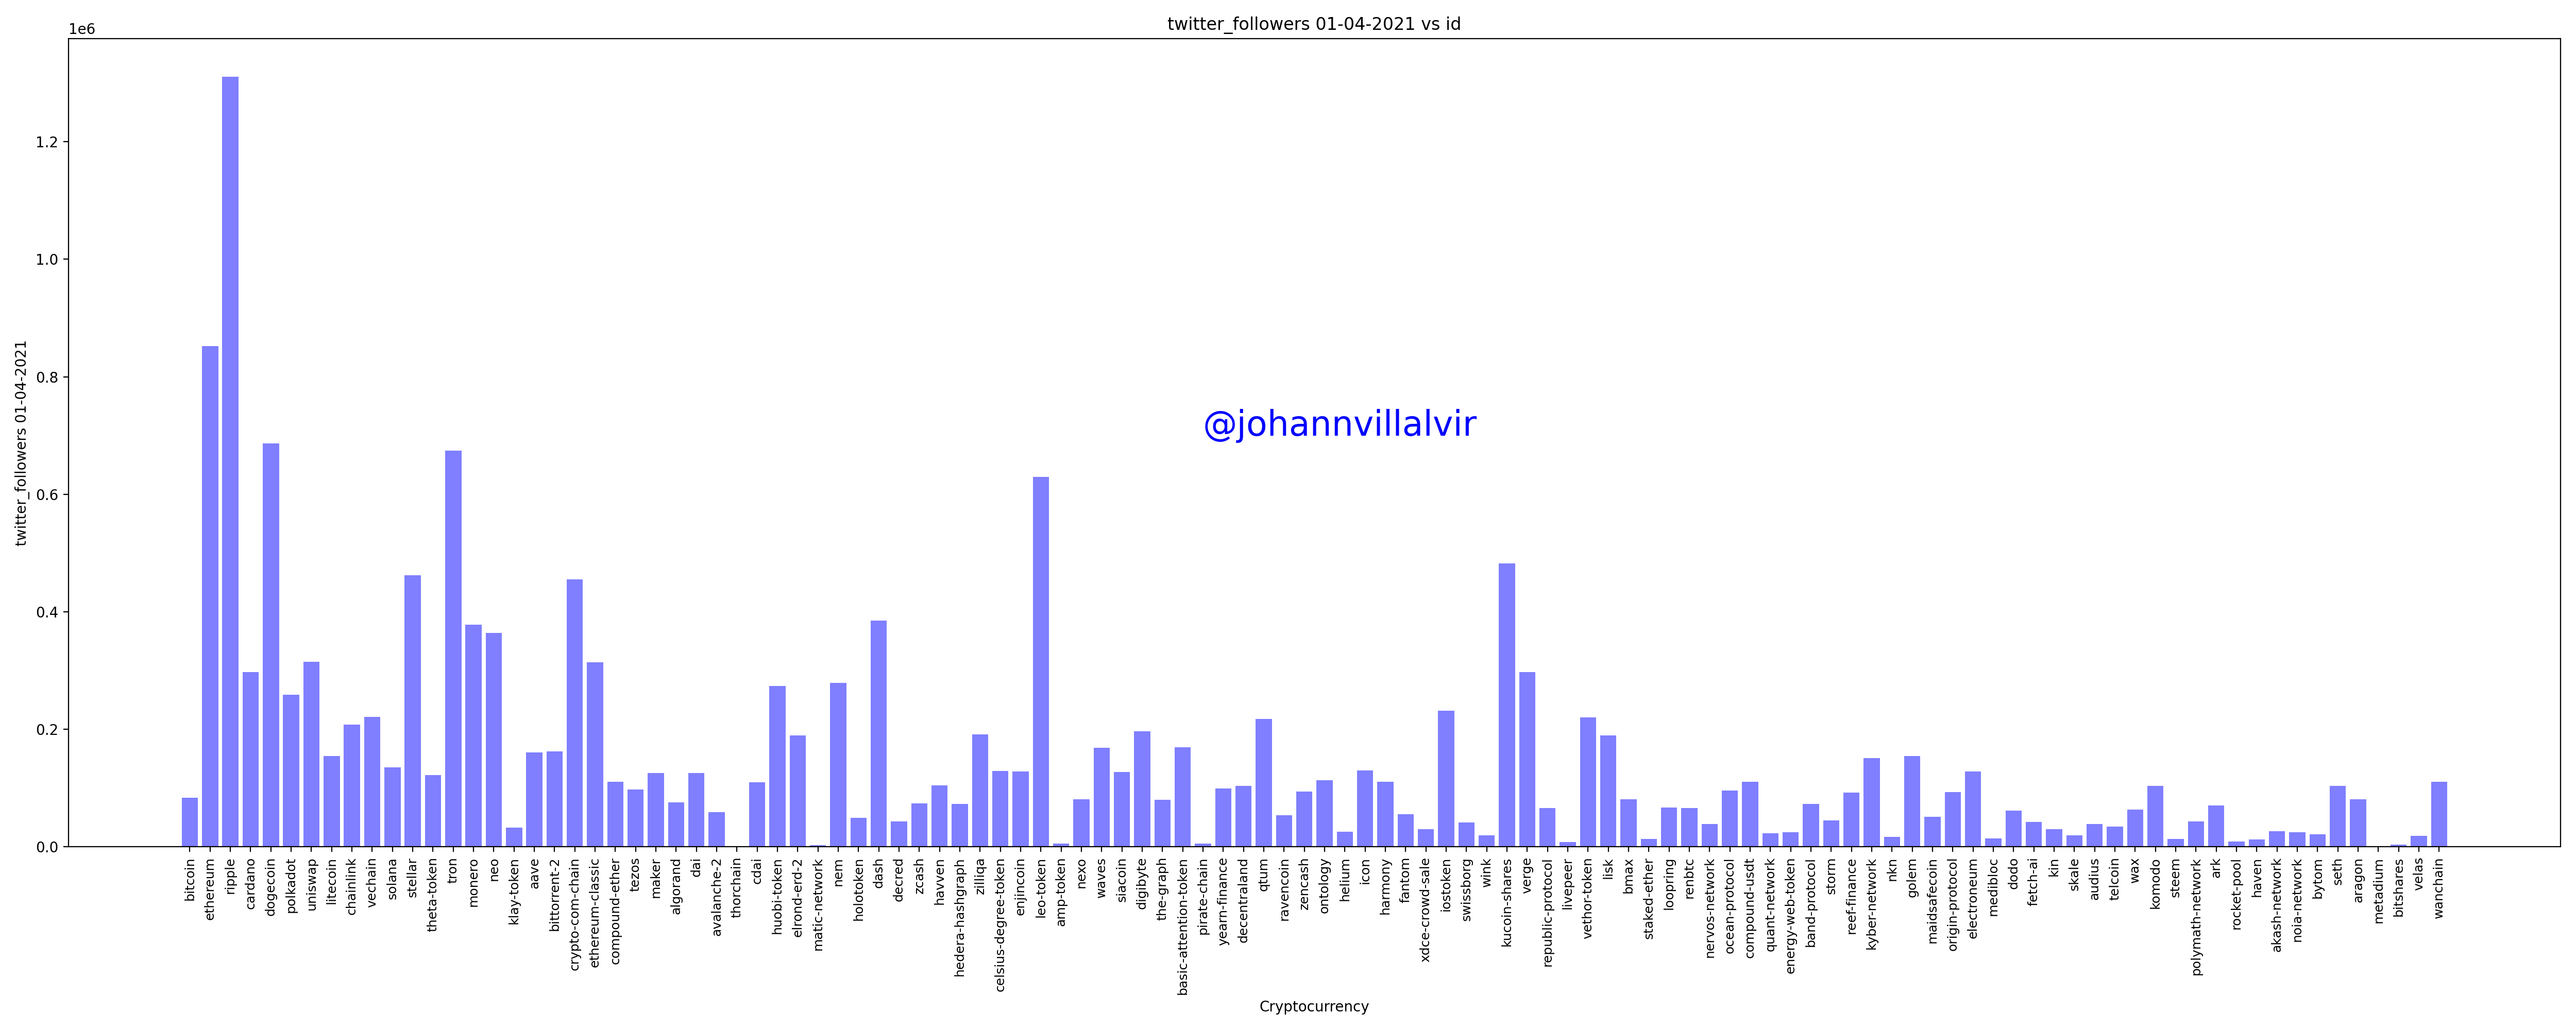

In [16]:
bar_plot(clean_2021_df, 'id', 'twitter_followers 01-04-2021', fig_size=[25,10]) 
plt.savefig("images/2021_twitter.png")

<IPython.core.display.Javascript object>


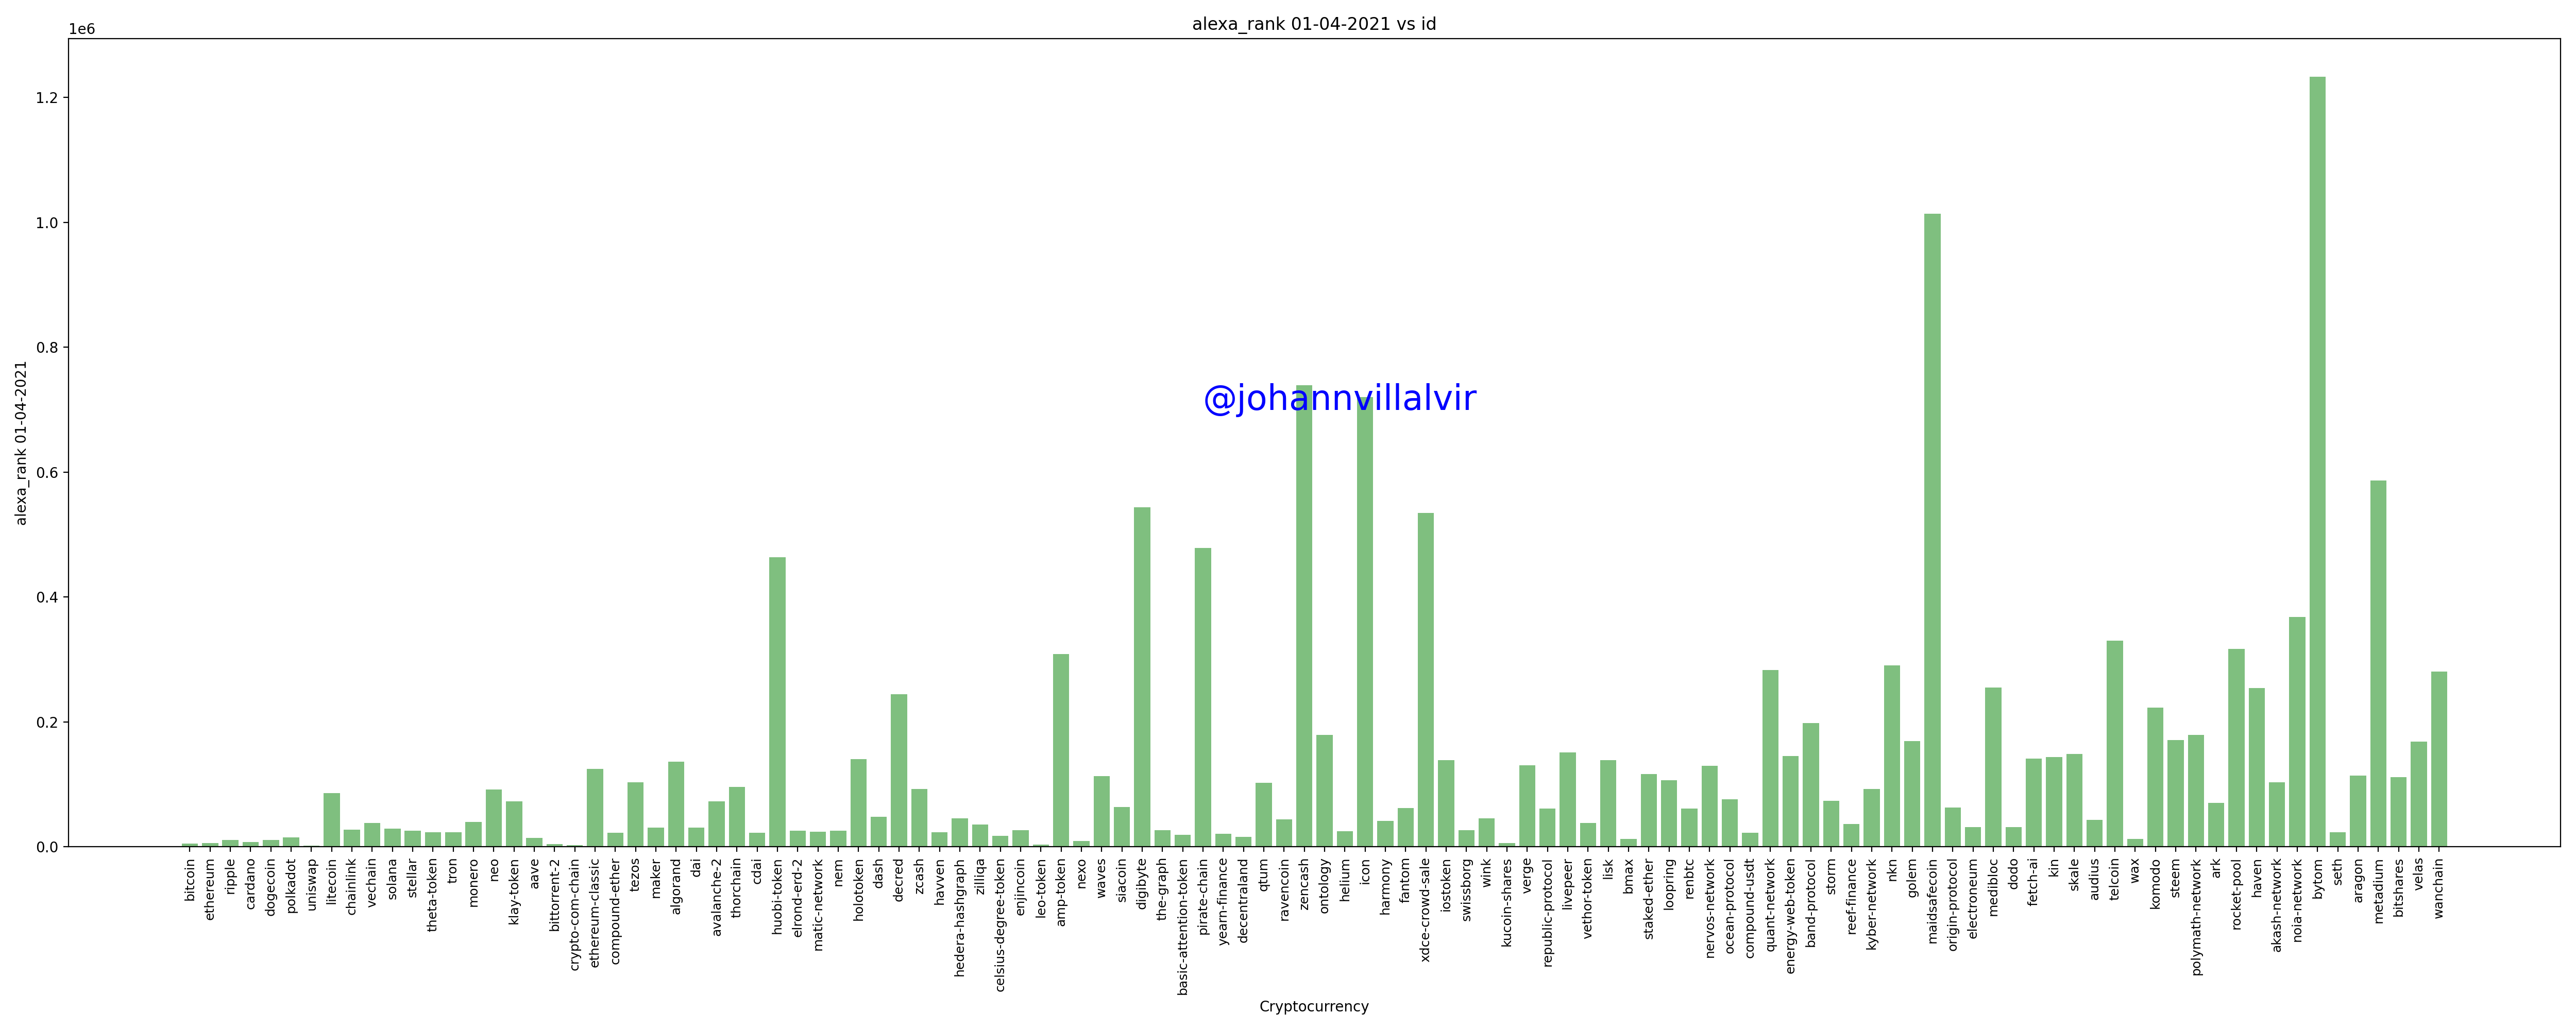

In [17]:
bar_plot(clean_2021_df, 'id', 'alexa_rank 01-04-2021', 'g', [25,10])
plt.savefig("images/2021_alexa.png")

In [18]:
# merge both data frames to get full picture of social metrics between 2018 and 2021
social_metrics_merged_df = pd.merge(clean_2018_df, clean_2021_df,on="id", how="right")
#social_metrics_merged_df.dropna(inplace=True)
social_metrics_merged_df.head()

,id,price 01-04-2018,market_cap_2018(millions),reddit_subscribers 01-04-2018,twitter_followers 01-04-2018,alexa_rank 01-04-2018,price 01-04-2021,market_cap_2021(millions),reddit_subscribers 01-04-2021,twitter_followers 01-04-2021,alexa_rank 01-04-2021
0,bitcoin,6975.275314,118.234055,785619.0,819312.0,5574.0,58817.373888,1.098127e+06,2648989.0,83714.0,5018.0
1,ethereum,395.796381,39.000868,348116.0,382159.0,8204.0,1915.832536,2.212107e+05,753614.0,852223.0,6152.0
2,ripple,0.511990,20.016004,184063.0,843082.0,5224.0,0.573818,2.634585e+04,278986.0,1310270.0,11412.0
3,cardano,0.155532,4.032488,60486.0,124345.0,13650.0,1.192192,3.826120e+04,302631.0,297688.0,8118.0
4,dogecoin,0.002799,0.318539,115819.0,208970.0,31077.0,0.054382,7.014690e+03,1229059.0,686374.0,11467.0


In [19]:
clean_social_metrics_merged_df = social_metrics_merged_df.dropna()
clean_social_metrics_merged_df.head()

,id,price 01-04-2018,market_cap_2018(millions),reddit_subscribers 01-04-2018,twitter_followers 01-04-2018,alexa_rank 01-04-2018,price 01-04-2021,market_cap_2021(millions),reddit_subscribers 01-04-2021,twitter_followers 01-04-2021,alexa_rank 01-04-2021
0,bitcoin,6975.275314,118.234055,785619.0,819312.0,5574.0,58817.373888,1.098127e+06,2648989.0,83714.0,5018.0
1,ethereum,395.796381,39.000868,348116.0,382159.0,8204.0,1915.832536,2.212107e+05,753614.0,852223.0,6152.0
2,ripple,0.511990,20.016004,184063.0,843082.0,5224.0,0.573818,2.634585e+04,278986.0,1310270.0,11412.0
3,cardano,0.155532,4.032488,60486.0,124345.0,13650.0,1.192192,3.826120e+04,302631.0,297688.0,8118.0
4,dogecoin,0.002799,0.318539,115819.0,208970.0,31077.0,0.054382,7.014690e+03,1229059.0,686374.0,11467.0


In [20]:
# create a function to do a scatter plot
def scatter_plot(dataframe, x_values, y_values, fig_size=[9,5], color='red', edgecolor='black', marker='o'):

    plt.figure(figsize = fig_size)
    x_axis = dataframe[f"{x_values}"]
    y_axis = dataframe[f"{y_values}"]
    plt.scatter(x_axis, y_axis, color=f"{color}", edgecolor=f"{edgecolor}", marker=f"{marker}")
    plt.xlabel(f"{x_axis.name}")
    plt.ylim(-0.2, 3.8)
    plt.xlim(-10, 100000)
    #plt.ylim((min(dataframe[f"{y_values}"]) * (-1.5)), (max(dataframe[f"{y_values}"]) * 0.6))
    plt.ylabel(f"{y_axis.name}")
    plt.tight_layout()
    plt.show()
#    print(plt.ylim(min(dataframe[f"{y_values}"]), max(dataframe[f"{y_values}"])))
    


In [21]:
#(min(dataframe[f"{y_values}"]) *.5)
#(max(dataframe[f"{y_values}"]) * 2)

<IPython.core.display.Javascript object>


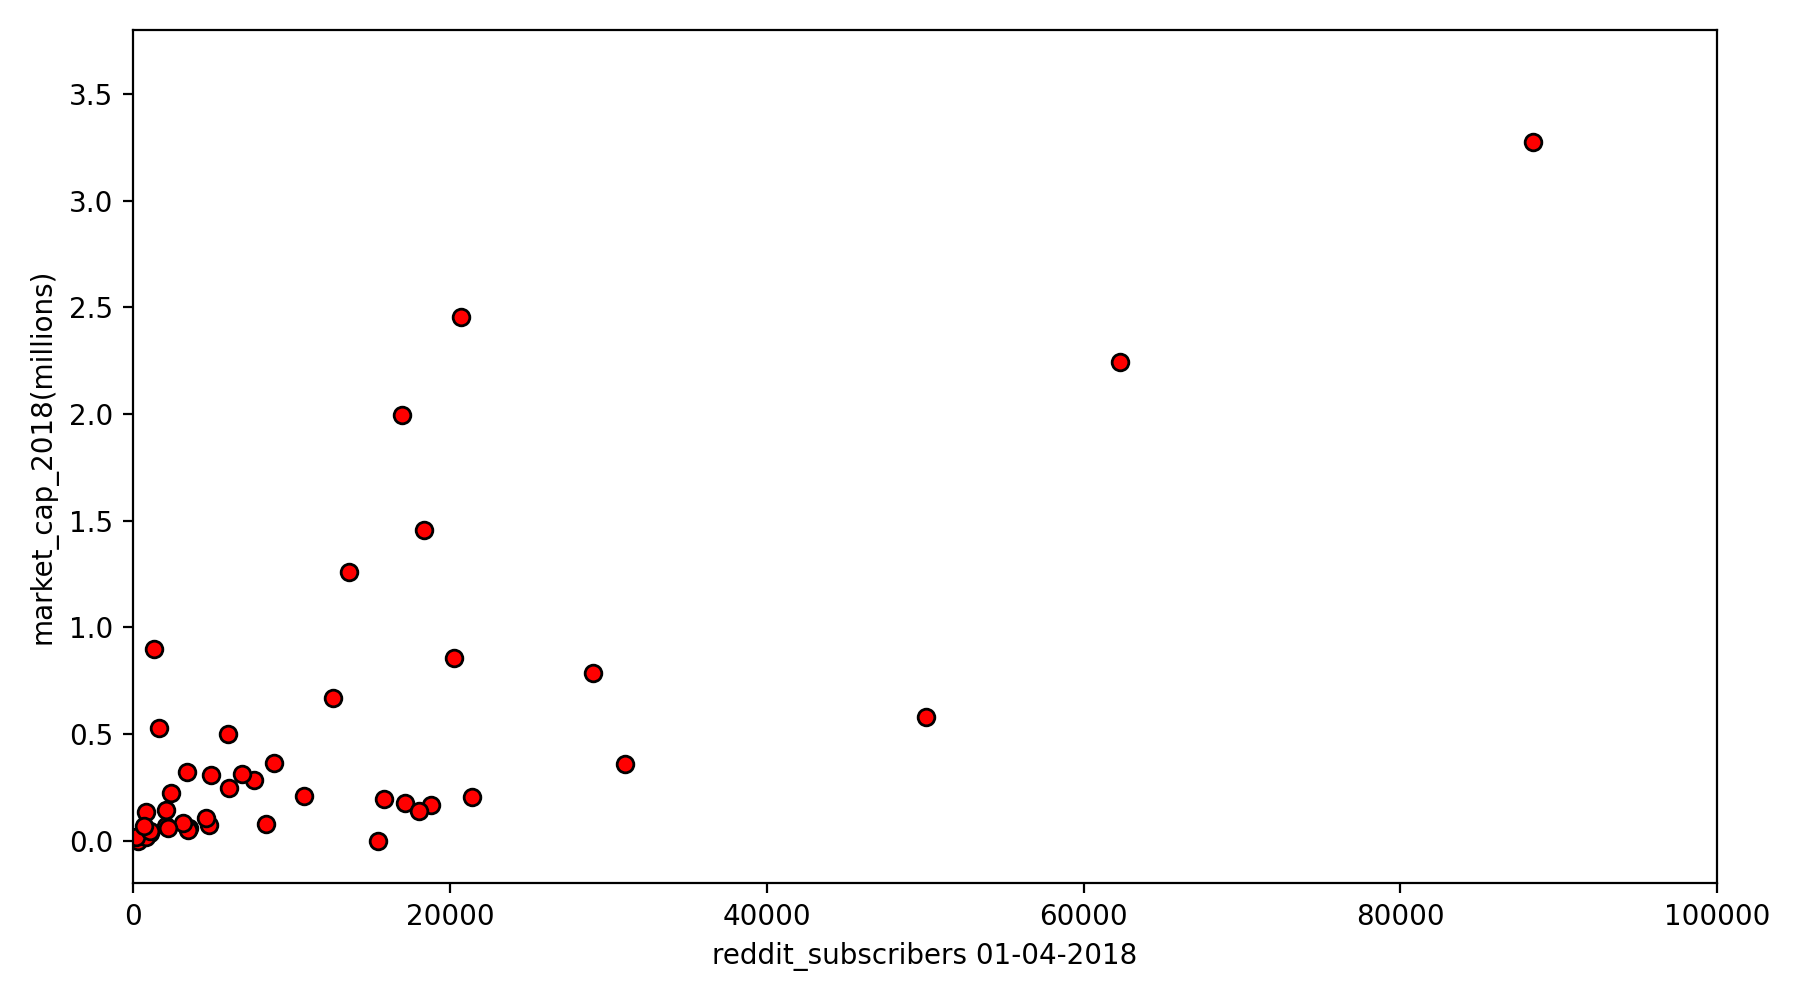

In [27]:
scatter_plot(clean_social_metrics_merged_df, 'reddit_subscribers 01-04-2018', 'market_cap_2018(millions)')
plt.savefig("images/2018_reddit_vs_market_cap.png")

<IPython.core.display.Javascript object>


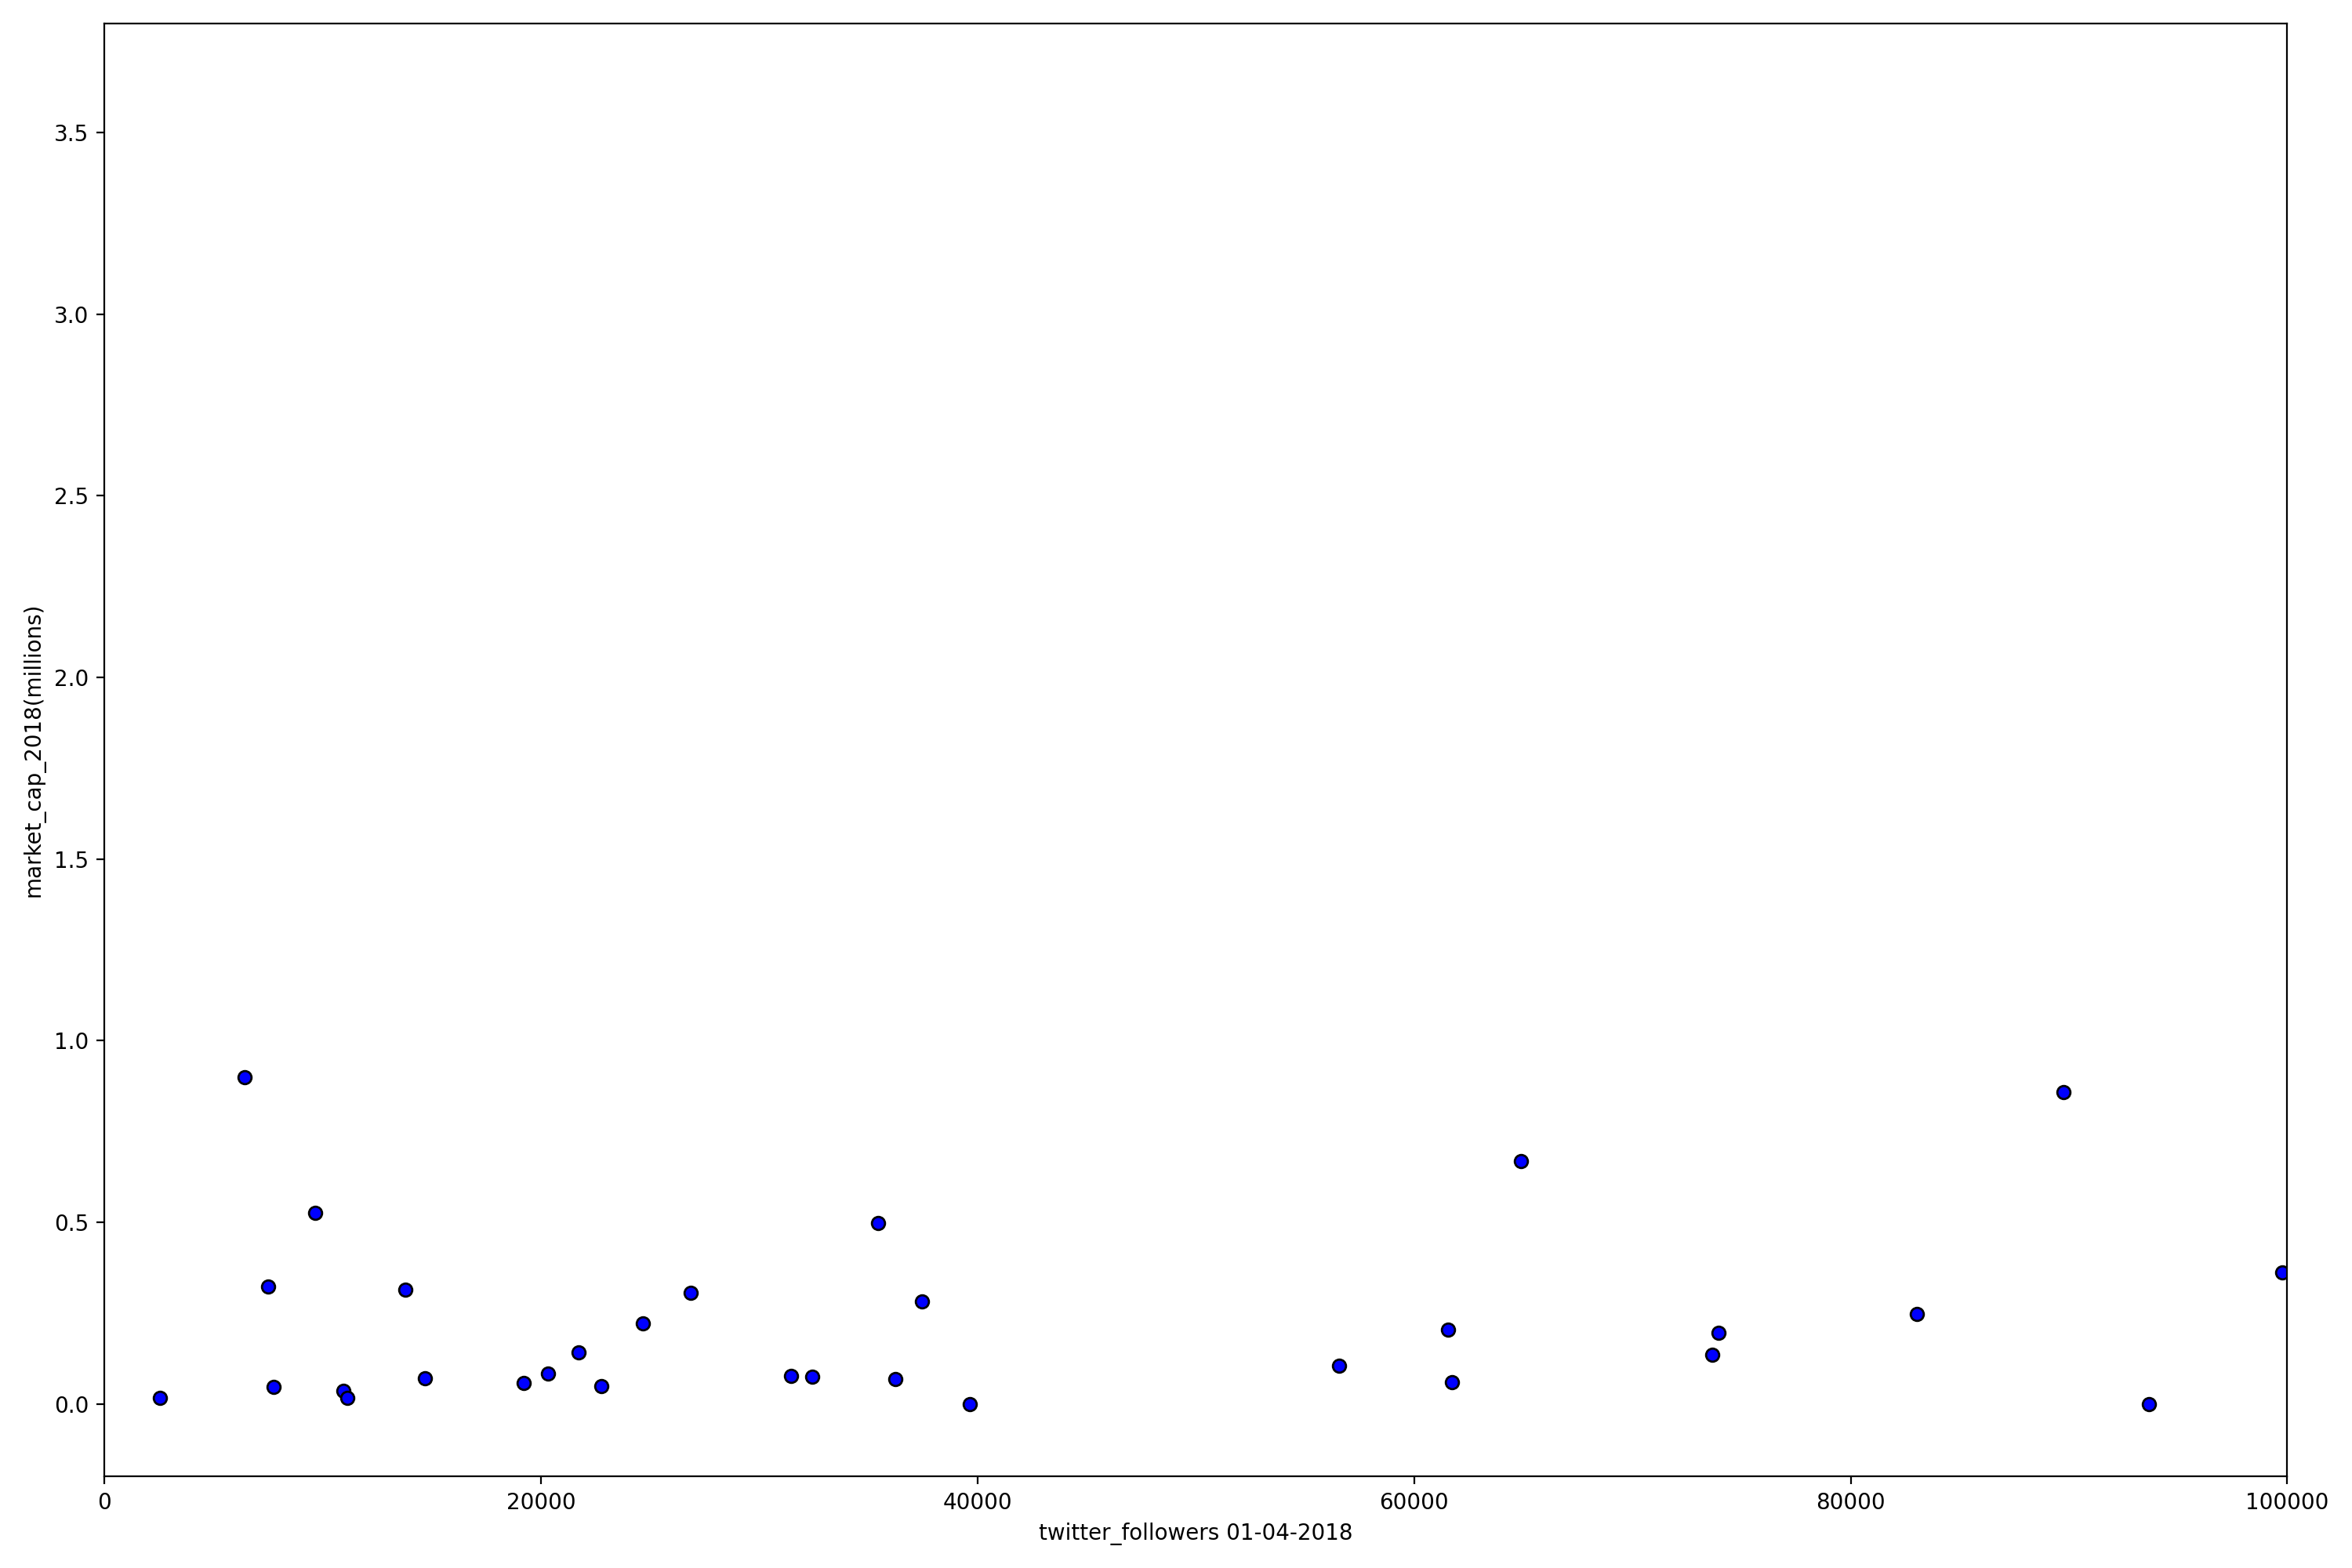

In [24]:
scatter_plot(clean_social_metrics_merged_df, "twitter_followers 01-04-2018", "market_cap_2018(millions)", fig_size = [15,10], color='b')

In [25]:
social_metrics_merged_df.columns

Index(['id', 'price 01-04-2018', 'market_cap_2018(millions)',
       'reddit_subscribers 01-04-2018', 'twitter_followers 01-04-2018',
       'alexa_rank 01-04-2018', 'price 01-04-2021',
       'market_cap_2021(millions)', 'reddit_subscribers 01-04-2021',
       'twitter_followers 01-04-2021', 'alexa_rank 01-04-2021'],
      dtype='object')

<IPython.core.display.Javascript object>


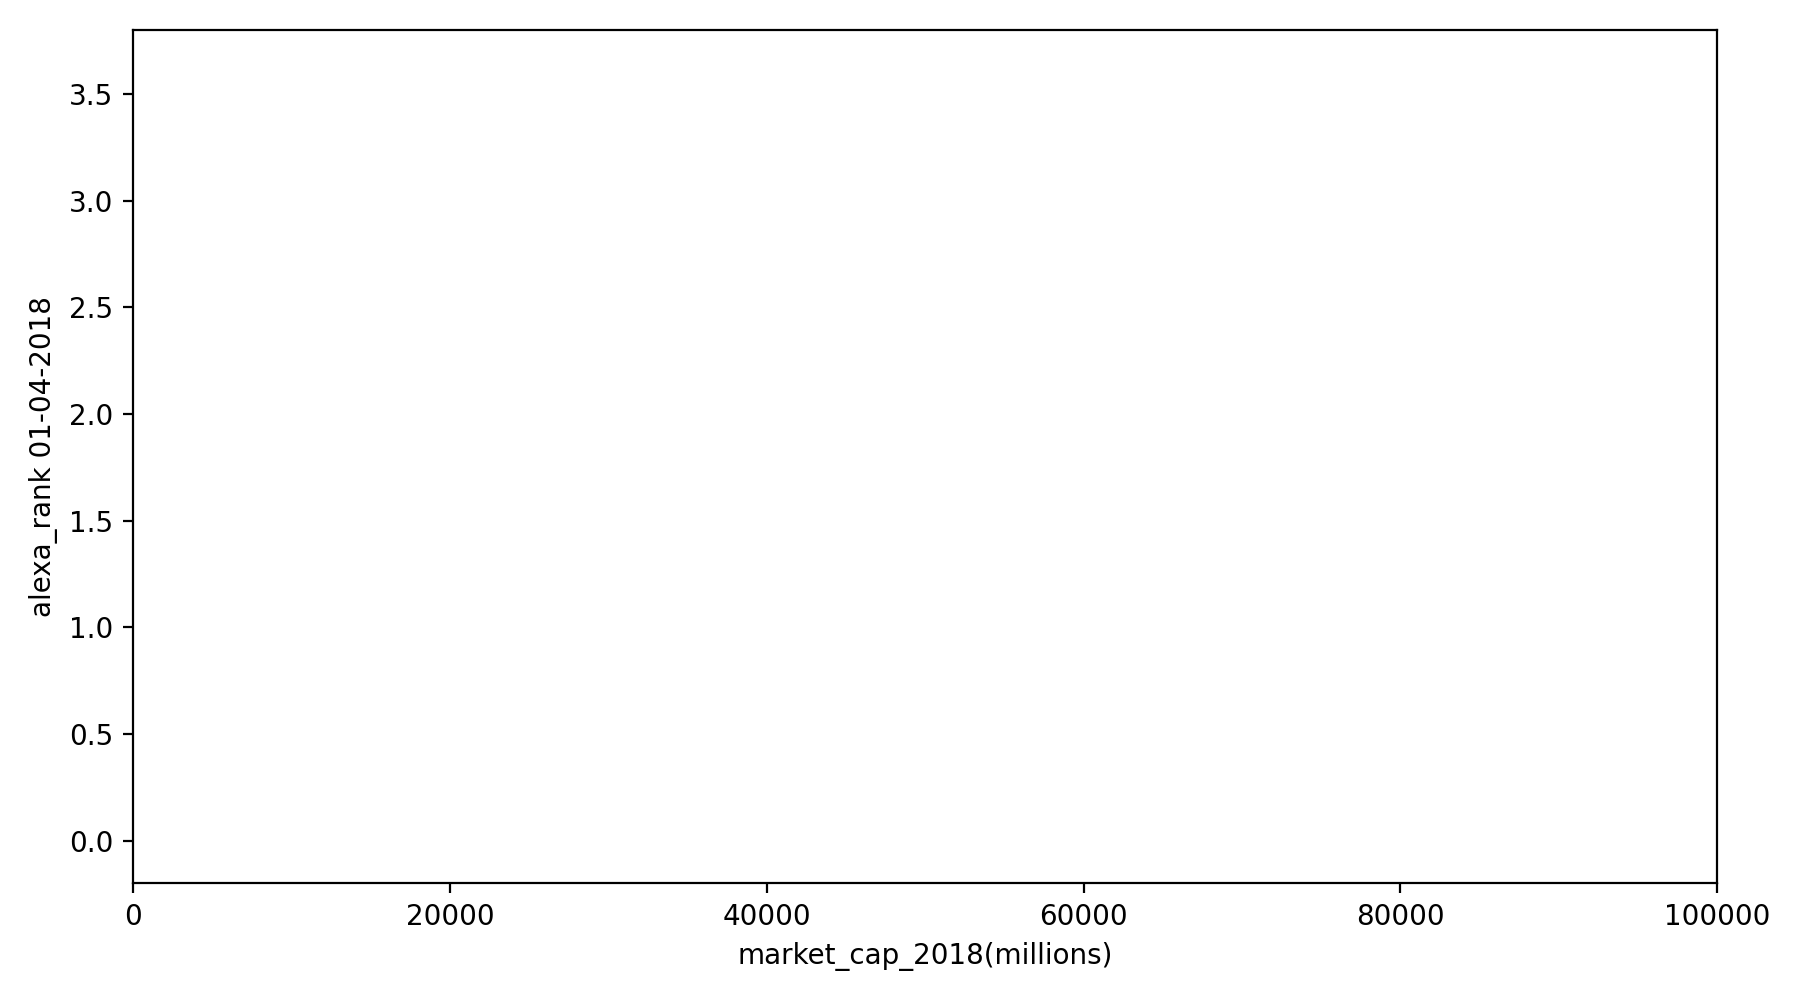

In [26]:
scatter_plot(social_metrics_merged_df,'market_cap_2018(millions)','alexa_rank 01-04-2018', color='g')

In [ ]:
clean_2018_df.columns

In [ ]:
scatter_plot(clean_2018_df, 'market_cap_2018(millions)', 'reddit_subscribers 01-04-2018')